In [3]:
# Analysis of Egyptian Student Grades Dataset

## 1. Import Libraries and Load Data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_excel('Data/High_School_Grades_2025.xlsx')

Data Exploration

In [4]:
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (810980, 1)

First few rows:


,total_degree
0,163.5
1,187.5
2,168.0
3,212.0
4,154.0


In [6]:
print("Basic statistics:")
df['total_degree'].describe()

Basic statistics:


count    810980.000000
mean        210.962989
std          62.900660
min           0.000000
25%         181.500000
50%         217.000000
75%         255.000000
max         404.000000
Name: total_degree, dtype: float64

Data Cleaning and Validation

In [7]:
# Check for invalid grades (outside 0-410 range)
invalid_grades = df[(df['total_degree'] < 0) | (df['total_degree'] > 410)]
print(f"Found {len(invalid_grades)} invalid grades")

# Remove invalid records
df_clean = df[(df['total_degree'] >= 0) & (df['total_degree'] <= 410)]
print(f"Cleaned dataset: {len(df_clean)} records ({len(df) - len(df_clean)} removed)")

Found 0 invalid grades
Cleaned dataset: 810980 records (0 removed)


Create Grade Categories

In [8]:
# Define Egyptian grading scale bins
bin_edges = [0, 205, 266.5, 328, 369, 410]
bin_labels = ['Fail', 'Pass', 'Good', 'Very Good', 'Excellent']

df_clean['Grade_Group'] = pd.cut(df_clean['total_degree'], 
                                 bins=bin_edges, 
                                 labels=bin_labels, 
                                 include_lowest=True)

# Display distribution
grade_distribution = df_clean['Grade_Group'].value_counts().sort_index()
grade_distribution

Grade_Group
Fail         334321
Pass         329136
Good         144527
Very Good      2356
Excellent       640
Name: count, dtype: int64

Visualizations

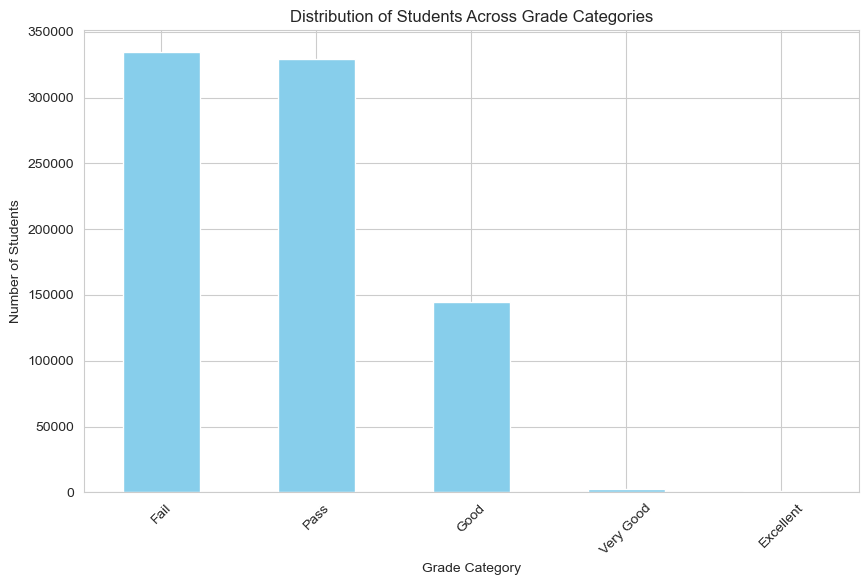

In [9]:
# Grade distribution bar chart
plt.figure(figsize=(10, 6))
grade_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Students Across Grade Categories')
plt.xlabel('Grade Category')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

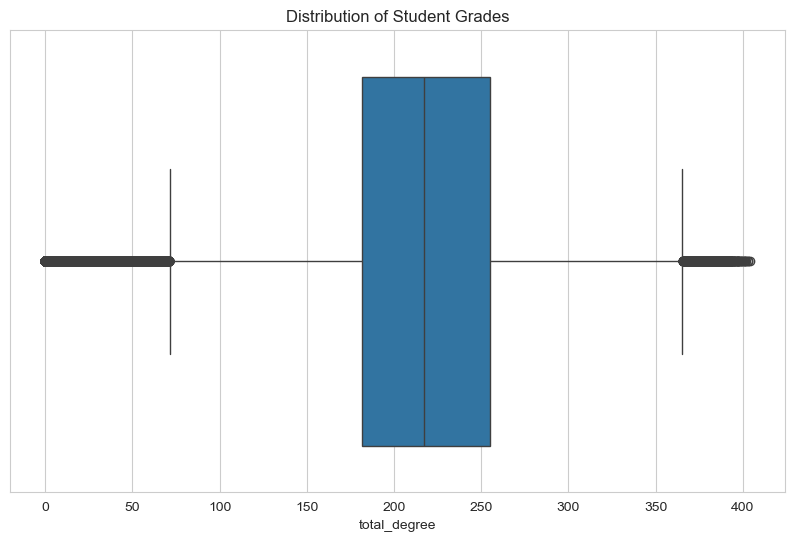

In [11]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['total_degree'])
plt.title('Distribution of Student Grades')
plt.show()

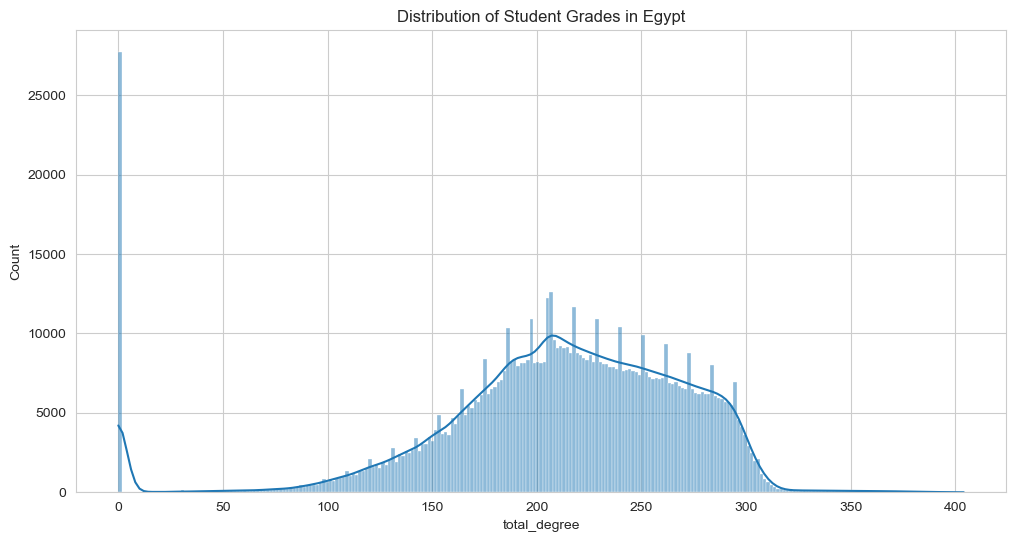

In [17]:
sns.histplot(data=df, x='total_degree', kde=True)
plt.title('Distribution of Student Grades in Egypt')
plt.show()

Advanced Analysis

In [14]:
# Calculate percentile ranks
df_clean['percentile_rank'] = df_clean['total_degree'].rank(pct=True)

# Show top 10 students
top_students = df_clean.nlargest(10, 'total_degree')[['total_degree', 'percentile_rank']]
top_students

,total_degree,percentile_rank
793018,404.0,1.000000
782658,403.0,0.999998
793217,403.0,0.999998
786680,402.0,0.999996
777146,401.5,0.999994
779797,401.5,0.999994
790011,400.5,0.999993
797387,400.0,0.999991
771793,399.5,0.999990
790947,399.0,0.999988


Export Results

In [15]:
# Save cleaned data with new columns
df_clean.to_excel('egypt_students_analyzed.xlsx', index=False)
print("Analysis complete! Data saved to 'egypt_students_analyzed.xlsx'")

Analysis complete! Data saved to 'egypt_students_analyzed.xlsx'
